# Tutorial 1 PyTorch Basics: Tensor

## Tensor

<b>The contents of this tutorial is largely based on the book and tutorial notes here[^1].

Tensor, also known as tensor, readers may be familiar with this term, because it not only appeared in PyTorch, but also in Theano, TensorFlow,
Important data structures in Torch and MxNet. There is no lack of in-depth analysis of the nature of tensors, but from an engineering point of view, it can be simply considered as an array and supports efficient scientific computing. It can be a number (scalar), a one-dimensional array (vector), a two-dimensional array (matrix), and a higher-dimensional array (higher-order data). Tensor is similar to Numpy's ndarrays, but PyTorch's tensor supports GPU acceleration.

This section will systematically explain the use of tensor, trying to cover everything, but not every function. For more functions and their usage, readers can view the help documentation by adding `?` to the function name in IPython/Notebook, or refer to the official PyTorch documentation[^1].

[^1]: http://docs.pytorch.org </b>

In [ ]:
# Let's begin
from __future__ import print_function
import torch  as t
t.__version__

'1.13.1+cu116'

### <b>3.1.1 Basic operations</b>

Readers who have studied Numpy will feel very familiar with the content of this section, because the tensor interface is intentionally designed to be similar to Numpy for the convenience of users. But it doesn't matter if you are not familiar with Numpy. This section does not require you to master Numpy first.

From the interface point of view, operations on tensor can be divided into two categories:

1. `torch.function`, such as `torch.save` etc.
2. The other category is `tensor.function`, such as `tensor.view`, etc.

For ease of use, most operations on tensor support these two types of interfaces at the same time, and no specific distinction is made in this book, such as `torch.sum (torch.sum(a, b))` and `tensor.sum (a. sum(b))` is functionally equivalent.

From the perspective of storage, operations on tensor can be divided into two categories:

1. It will not modify its own data, such as `a.add(b)`, the addition result will return a new tensor.
2. It will modify its own data, such as `a.add_(b)`, the addition result is still stored in a, and a has been modified.

Function names ending with `_` are all inplace methods, which will modify the caller's own data, which need to be distinguished in practical applications.

#### <b>Create Tensor</b>

There are many ways to create a new tensor in PyTorch, as shown in Table 3-1.

Table 3-1: Common ways to create a new tensor

|function|function|
|:---:|:---:|
|Tensor(\*sizes)|Basic constructor|
|tensor(data,)|Constructor similar to np.array|
|ones(\*sizes)|full 1Tensor|
|zeros(\*sizes)|full 0Tensor|
|eye(\*sizes)|diagonal is 1, others are 0|
|arange(s,e,step|from s to e, the step size is step|
|linspace(s,e,steps)|From s to e, evenly divided into steps|
|rand/randn(\*sizes)|uniform/standard distribution|
|normal(mean,std)/uniform(from,to)|normal distribution/uniform distribution|
|randperm(m)|random permutation|

These creation methods can specify the data type dtype and storage device (cpu/gpu) when creating.


Among them, using the `Tensor` function to create a tensor is the most complex and changeable method. It can receive a list and create a tensor based on the list data, or create a tensor according to a specified shape, and pass in other tensors. The following examples A few examples.

In [ ]:
# Specify the shape of the tensor
a = t.Tensor(2, 3)
a # The value depends on the state of the memory space, it may overflow when printing

tensor([[8.2955e-35, 0.0000e+00, 3.7835e-44],
        [0.0000e+00,        nan, 1.4153e-43]])

In [ ]:
# Create tensor with list data
b = t.Tensor([[1,2,3],[4,5,6]])
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
b.tolist() # convert tensor to list

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

`tensor.size()` returns `torch.Size` object, which is a subclass of tuple, but its usage is slightly different from tuple

In [ ]:
b_size = b.size()
b_size

torch.Size([2, 3])

In [ ]:
b.numel() # The total number of elements in b, 2*3, equivalent to

6

In [ ]:
# Create a tensor with the same shape as b
c = t.Tensor(b_size)
# Create a tensor with elements 2 and 3
d = t.Tensor((2, 3))
c, d

In addition to `tensor.size()`, you can also use `tensor.shape` to directly view the shape of the tensor, `tensor.shape` is equivalent to `tensor.size()`

In [ ]:
c.shape

It should be noted that when `t.Tensor(*sizes)` creates a tensor, the system will not allocate space immediately, but will only calculate whether the remaining memory is enough to use. It will only be allocated when the tensor is used, and other operations are created Space allocation is performed immediately after tensor is finished. Examples of other commonly used methods for creating tensors are as follows.

In [ ]:
t.ones(2, 3)

In [ ]:
t.zeros(2, 3)

In [ ]:
t.arange(1, 6, 2)

In [ ]:
t.linspace(1, 10, 3)

In [ ]:
t.randn(2, 3, device=t.device('cpu'))

In [ ]:
t.randperm(5) # random permutation of length 5

In [ ]:
t.eye(2, 3, dtype=t.int) # Diagonal line is 1, does not require the same number of rows and columns

tensor([[1, 0, 0],
        [0, 1, 0]], dtype=torch.int32)

`torch.tensor` is a new version of the tensor creation method added in version 0.4, the method used, and the parameters are almost exactly the same as `np.array`

In [ ]:
scalar = t.tensor(3.14159) 
print('scalar: %s, shape of sclar: %s' %(scalar, scalar.shape))

In [ ]:
vector = t.tensor([1, 2])
print('vector: %s, shape of vector: %s' %(vector, vector.shape))

In [ ]:
tensor = t.Tensor(1,2) # Note the difference with t.tensor([1, 2])
tensor.shape

In [ ]:
matrix = t.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])
matrix,matrix.shape

In [ ]:
t.tensor([[0.11111, 0.222222, 0.3333333]],
                     dtype=t.float64,
                     device=t.device('cpu'))

In [ ]:
empty_tensor = t.tensor([])
empty_tensor.shape

#### <b>Commonly used Tensor operations</b>

The shape of the tensor can be adjusted by the `tensor.view` method, but the total number of elements before and after adjustment must be consistent. `view` will not modify its own data, and the returned new tensor shares memory with the source tensor, that is, if one of them is changed, the other one will also be changed. In practical applications, it may often be necessary to add or reduce a certain dimension. At this time, the two functions `squeeze` and `unsqueeze` come in handy.

In [ ]:
a = t.arange(0, 6)
print("a = ", a)
a.view(2, 3)

a =  tensor([0, 1, 2, 3, 4, 5])


tensor([[0, 1, 2],
        [3, 4, 5]])

In [ ]:
b = a.view(-1, 3) # When a dimension is -1, its size will be automatically calculated
b.shape

torch.Size([2, 3])

In [ ]:
b.unsqueeze(1) # Pay attention to the shape, add "1" to the first dimension (subscript starts from 0)
#Equivalent to b[:,None]
b[:, None].shape

torch.Size([2, 1, 3])

In [ ]:
b.unsqueeze(-2) # -2 means the penultimate dimension
b.shape

torch.Size([2, 3])

In [ ]:
c = b.view(1, 1, 1, 2, 3)
c.squeeze(0) # compress the "1" of the 0th dimension

tensor([[[[0, 1, 2],
          [3, 4, 5]]]])

In [ ]:
c.squeeze() # compress all dimension "1"

tensor([[0, 1, 2],
        [3, 4, 5]])

In [ ]:
a[1] = 100
b # a modification, b as the view, will also be modified

tensor([[  0, 100,   2],
        [  3,   4,   5]])

`resize` is another method that can be used to adjust `size`, but unlike `view`, it can modify the size of the tensor. If the new size exceeds the original size, new memory space will be allocated automatically, and if the new size is smaller than the original size, the previous data will still be saved, see an example.

In [ ]:
b.resize_(1, 3)
b

tensor([[  0, 100,   2]])

In [ ]:
b.resize_(3, 3) # The old data is still saved, and the extra size will allocate new space
b

tensor([[                  0,                 100,                   2],
        [                  3,                   4,                   5],
        [3180222411935070754, 8391722768137527840, 7959390389040738153]])

#### <b>Index operations</b>

Tensor supports indexing operations similar to numpy.ndarray, and the syntax is similar. The following uses some examples to explain common indexing operations. Unless otherwise specified, the indexed result shares memory with the original tensor, that is, if one is modified, the other will be modified accordingly.

In [ ]:
a = t.randn(3, 4)
a

tensor([[-0.3197,  1.2075, -0.6853, -0.0314],
        [-0.1075, -0.6556,  1.3470, -0.6672],
        [-1.9355,  0.8121,  0.4140,  1.7275]])

In [ ]:
a[0] # line 0 (subscript starts from 0)

tensor([-0.3197,  1.2075, -0.6853, -0.0314])

In [ ]:
a[:, 0] # column 0

tensor([-0.3197, -0.1075, -1.9355])

In [ ]:
a[0][2] # The second element of row 0, equivalent to a[0, 2]

tensor(-0.6853)

In [ ]:
a[0, -1] # last element of line 0

tensor(-0.0314)

In [ ]:
a[:2] # The first two rows

In [ ]:
a[:2, 0:2] # The first two rows, columns 0 and 1

In [ ]:
print(a[0:1, :2]) # row 0, first two columns
print(a[0, :2]) # Note the difference between the two: different shapes

In [ ]:
# None is similar to np.newaxis, adding a new axis for a
# Equivalent to a.view(1, a.shape[0], a.shape[1])
a[None].shape

torch.Size([1, 3, 4])

In [ ]:
a[None].shape # Equivalent to a[None,:,:]

torch.Size([1, 3, 4])

In [ ]:
a[:,None,:].shape

torch.Size([3, 1, 4])

In [ ]:
a[:,None,:,None,None].shape

torch.Size([3, 1, 4, 1, 1])

In [ ]:
a > 1 # return a ByteTensor

tensor([[False,  True, False, False],
        [False, False,  True, False],
        [False, False, False,  True]])

In [ ]:
a[a>1] # equivalent to a.masked_select(a>1)
# The selection result does not share the memory space with the original tensor

tensor([1.2075, 1.3470, 1.7275])

In [ ]:
a[t.LongTensor([0,1])] # line 0 and line 1

tensor([[-0.3197,  1.2075, -0.6853, -0.0314],
        [-0.1075, -0.6556,  1.3470, -0.6672]])

Other commonly used selection functions are shown in Table.

Table 3-2 Commonly used selection functions

function|function|
:---:|:---:|
index_select(input, dim, index) | Select on the specified dimension dim, such as selecting certain rows and certain columns
masked_select(input, mask)|Example as above, a[a>0], use ByteTensor to select
non_zero(input)|subscript of non-zero elements
gather(input, dim, index)|According to index, select data in dim dimension, the output size is the same as index


`gather` is a relatively complex operation. For a 2-dimensional tensor, each element of the output is as follows:

```python
out[i][j] = input[index[i][j]][j] # dim=0
out[i][j] = input[i][index[i][j]] # dim=1
```
The `gather` operation of the 3D tensor is the same. Here are a few examples.

In [ ]:
a = t.arange(0, 16).view(4, 4)
a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [ ]:
# Select the elements of the diagonal
index = t.LongTensor([[0,1,2,3]])
print("index = ", index)
a.gather(0, index)

index =  tensor([[0, 1, 2, 3]])


tensor([[ 0,  5, 10, 15]])

In [ ]:
# Select elements on the anti-diagonal
index = t.LongTensor([[3,2,1,0]]).t()
a.gather(1, index)

tensor([[ 3],
        [ 6],
        [ 9],
        [12]])

In [ ]:
# Select the elements on the anti-diagonal, pay attention to the difference from the above
index = t.LongTensor([[3,2,1,0]])
a.gather(0, index)

In [ ]:
# Select elements on two diagonals
index = t.LongTensor([[0,1,2,3],[3,2,1,0]]).t()
b = a.gather(1, index)
b

The inverse operation corresponding to `gather` is `scatter_`, `gather` fetches the data from the input according to the index, and `scatter_` puts the fetched data back. Note that the `scatter_` function is an inplace operation.

```python
out = input. gather(dim, index)
-->Approximate inverse operation
out = Tensor()
out.scatter_(dim, index)
```

In [ ]:
# Put the two diagonal elements back to the specified position
c = t.zeros(4,4)
c.scatter_(1, index, b.float())

Any index operation on a tensor is still a tensor. To get the value of a standard python object, you need to call `tensor.item()`. This method is only applicable to tensors containing one element.

In [ ]:
a[0,0] #is still tensor

In [ ]:
a[0,0].item() # python float

In [ ]:
d = a[0:1, 0:1, None]
print(d.shape)
d.item() # Only a tensor containing one element can call tensor.item, regardless of shape

In [ ]:
# a[0].item()  ->
# raise ValueError: only one element tensors can be converted to Python scalars

#### Advanced Indexing
PyTorch has perfected the index operation in version 0.2, and currently supports most of numpy's advanced indexes [^10]. Advanced indexing can be regarded as an extension of ordinary indexing operations, but the results of advanced indexing operations generally do not share memory with the original Tensor.
[^10]: https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#advanced-indexing

In [ ]:
x = t.arange(0,27).view(3,3,3)
x

In [ ]:
x[[1, 2], [1, 2], [2, 0]] # x[1,1,2] and x[2,2,0]

In [ ]:
x[[2, 1, 0], [0], [1]] # x[2,0,1],x[1,0,1],x[0,0,1]

In [ ]:
x[[0, 2], ...] # x[0] and x[2]

#### Tensor type

Tensor has different data types, as shown in Table, each type corresponds to CPU and GPU versions (except HalfTensor). The default tensor is FloatTensor, and the default tensor type can be modified by `t.set_default_tensor_type` (if the default type is GPU tensor, all operations will be performed on the GPU). The type of Tensor is very helpful for analyzing memory usage. For example, for a FloatTensor with a size of (1000, 1000, 1000), it has `1000*1000*1000=10^9` elements, and each element occupies 32bit/8 = 4Byte memory, so it occupies a total of about 4GB memory/video memory . HalfTensor is specially designed for the GPU version. With the same number of elements, the memory usage is only half of that of FloatTensor, so it can greatly alleviate the problem of insufficient GPU memory. However, due to the limited size and precision of the value that HalfTensor can represent[^2], So there may be problems such as overflow.

[^2]: https://stackoverflow.com/questions/872544/what-range-of-numbers-can-be-represented-in-a-16-32-and-64-bit-ieee-754-syste

Table 3-3: Tensor data types

| Data type | dtype | CPU tensor | GPU tensor |
| ------------------------ | ------------------------ --------- | ---------------------------------------- -------------------- | ------------------------- |
| 32-bit floating point | `torch.float32` or `torch.float` | `torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` | `torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` | `torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer (unsigned) | `torch.uint8` | [`torch.ByteTensor`](https://pytorch.org/docs/stable/tensors.html#torch.ByteTensor) | `torch.cuda.ByteTensor ` |
| 8-bit integer (signed) | `torch.int8` | `torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer (signed) | `torch.int16` or `torch.short` | `torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer (signed) | `torch.int32` or `torch.int` | `torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer (signed) | `torch.int64` or `torch.long` | `torch.LongTensor` | `torch.cuda.LongTensor` |

 

Each data type can be converted to each other. `type(new_type)` is a common method, and there are also shortcut methods such as `float`, `long`, and `half`. The conversion between CPU tensor and GPU tensor is realized by `tensor.cuda` and `tensor.cpu` methods, and `tensor.to(device)` can also be used. Tensor also has a `new` method, which is used in the same way as `t.Tensor`, which will call the constructor of the corresponding type of the tensor to generate a tensor that is consistent with the current tensor type. `torch.*_like(tensora)` can generate a new tensor with the same properties (type, shape, cpu/gpu) as `tensora`. `tensor.new_*(new_shape)` creates a new tensor with a different shape.

In [ ]:
# Set the default tensor, note that the parameter is a string
t.set_default_tensor_type('torch.DoubleTensor')

In [ ]:
a = t.Tensor(2,3)
a.dtype # now a is DoubleTensor, dtype is float64

In [ ]:
# restore previous default settings
t.set_default_tensor_type('torch.FloatTensor')

In [ ]:
# Convert a to FloatTensor, equivalent to b=a.type(t.FloatTensor)
b = a.float() 
b.dtype

In [ ]:
c = a.type_as(b)
c

In [ ]:
a.new(2,3) # Equivalent to torch.DoubleTensor(2,3), it is recommended to use a.new_tensor

In [ ]:
t.zeros_like(a) #equivalent to t.zeros(a.shape,dtype=a.dtype,device=a.device)

In [ ]:
t.zeros_like(a, dtype=t.int16) #Some attributes can be modified

In [ ]:
t.rand_like(a)

In [ ]:
a.new_ones(4,5, dtype=t.int)

In [ ]:
a.new_tensor([3,4]) # 

#### Element-by-element operations

This part of the operation will operate on each element of the tensor (point-wise, also known as element-wise), and the input and output shapes of such operations are consistent. Commonly used operations are shown in Table 3-4.

Table: Common element-wise operations

|function|function|
|:--:|:--:|
|abs/sqrt/div/exp/fmod/log/pow..|absolute value/square root/division/exponent/remainder/exponentiation..|
|cos/sin/asin/atan2/cosh..|related trigonometric functions|
|ceil/round/floor/trunc| round up/round down/round down/keep only the integer part|
|clamp(input, min, max)|Truncated beyond min and max|
|sigmod/tanh..|Activation function

For many operations, such as div, mul, pow, fmod, etc., PyTorch implements operator overloading, so operators can be used directly. For example, `a ** 2` is equivalent to `torch.pow(a,2)`, and `a * 2` is equivalent to `torch.mul(a,2)`.

The output of `clamp(x, min, max)` satisfies the following formula:
$$
y_i =
\begin{cases}
min, & \text{if } x_i \lt min \\
x_i, & \text{if } min \le x_i \le max \\
max, & \text{if } x_i \gt max\\
\end{cases}
$$
`clamp` is often used in some places that need to compare the size, such as taking the larger value of each element of a tensor and another number.

In [ ]:
a = t.arange(0, 6).view(2, 3).float()
t.cos(a)

In [ ]:
a % 3 # equivalent to t.fmod(a, 3)

In [ ]:
a ** 2 ## equivalent to t.pow(a, 2)

In [ ]:
# Take each element in a which is larger than 3 (those less than 3 are truncated to 3)
print(a)
t.clamp(a, min=3)

In [ ]:
b = a.sin_() # The effect is the same as a = a.sin();b=a , but it is more efficient and saves video memory
a

#### Merge operation
Such operations result in an output shape that is smaller than the input shape, and can perform specified operations along a certain dimension. Such as the addition `sum`, you can calculate the sum of the entire tensor, and you can also calculate the sum of each row or column in the tensor. Common merge operations are shown in Table 3-5.

Table: Common merge operations

|function|function|
|:---:|:---:|
|mean/sum/median/mode|mean/sum/median/mode|
|norm/dist|norm/distance|
|std/var|standard deviation/variance|
|cumsum/cumprod|cumulative/cumulative multiplication|

Most of the above functions have a parameter **`dim`**, used to specify which dimension these operations are performed on. There are different interpretations of dim (corresponding to axis in Numpy), here is a simple memory method:

Suppose the shape of the input is (m, n, k)

- If dim=0 is specified, the output shape is (1, n, k) or (n, k)
- If dim=1 is specified, the output shape is (m, 1, k) or (m, k)
- If dim=2 is specified, the output shape is (m, n, 1) or (m, n)

Whether there is "1" in size depends on the parameter `keepdim`, `keepdim=True` will keep the dimension `1`. Note that the above is just a summary of experience, not all functions conform to this shape change method, such as `cumsum`.

In [ ]:
b = t.ones(2, 3)
b.sum(dim = 0, keepdim=True)

In [ ]:
# keepdim=False, do not keep dimension "1", pay attention to shape
b. sum(dim=0, keepdim=False)

In [ ]:
b.sum(dim=1)

In [ ]:
a = t.arange(0, 6).view(2, 3)
print(a)
a.cumsum(dim=1) # accumulate along the row

#### Compare
Some of the comparison functions are element-wise comparisons, which operate like element-wise operations, and others are similar to merge operations. Commonly used comparison functions are shown in Table 3-6.

Table: Common comparison functions

|function|function|
|:--:|:--:|
|gt/lt/ge/le/eq/ne|greater than/less than/greater than or equal to/less than or equal to/equal to/not equal|
|topk|The largest k number|
|sort|sort|
|max/min| Compare the maximum and minimum values of two tensors|

The comparison operation in the first row of the table has implemented operator overloading, so you can use `a>=b`, `a>b`, `a!=b`, `a==b`, and the return result is a` ByteTensor`, which can be used to select elements. The two operations of max/min are quite special. For max, it has the following three usage situations:
- t.max(tensor): returns the largest number in tensor
- t.max(tensor,dim): The largest number on the specified dimension, returns tensor and subscript
- t.max(tensor1, tensor2): Compare the larger elements of the two tensors

As for comparing a tensor with a number, you can use the clamp function. The following example illustrates.

In [ ]:
a = t.linspace(0, 15, 6).view(2, 3)
a

tensor([[ 0.,  3.,  6.],
        [ 9., 12., 15.]])

In [ ]:
b = t.linspace(15, 0, 6).view(2, 3)
b

In [ ]:
a>b

In [ ]:
a[a>b] # a中大于b的元素

In [ ]:
t.max(a)

In [ ]:
t.max(b, dim=1) 
# The 15 and 6 of the first return value represent the largest element in row 0 and row 1 respectively
# The 0 and 0 of the second return value indicate that the above-mentioned largest number is the 0th element of the line

In [ ]:
t.max(a,b)

In [ ]:
# compare a and 10 larger elements
t.clamp(a, min=10)

#### Linear Algebra

The linear function of PyTorch mainly encapsulates Blas and Lapack, and its usage and interface are similar to it. Commonly used linear algebra functions are shown in Table 3-7.

Table : Commonly used linear algebra functions

|function|function|
|:---:|:---:|
|trace|sum of diagonal elements (trace of matrix)|
|diag|diagonal elements|
|triu/tril|Matrix upper/lower triangle, offset can be specified|
|mm/bmm|Matrix multiplication, batch matrix multiplication|
|addmm/addbmm/addmv/addr/badbmm..|Matrix operations
|t|transpose|
|dot/cross|Inner product/Outer product
|inverse| inverse matrix
|svd|Singular value decomposition

Please refer to the official document [^3] for specific usage instructions. It should be noted that the transposition of the matrix will cause the storage space to be discontinuous, and its `.contiguous` method needs to be called to convert it to continuous.
[^3]: http://pytorch.org/docs/torch.html#blas-and-lapack-operations

In [ ]:
b = a.t()
print("b = ", b)
b.is_contiguous()

b =  tensor([[ 0.,  9.],
        [ 3., 12.],
        [ 6., 15.]])


False

In [ ]:
b.contiguous()

tensor([[ 0.,  9.],
        [ 3., 12.],
        [ 6., 15.]])

### 3.1.2 Tensor and Numpy

There is a high similarity between Tensor and Numpy arrays, and the interoperation between them is also very simple and efficient. It should be noted that Numpy and Tensor share memory. Since Numpy has a long history and supports rich operations, when encountering an operation that Tensor does not support, it can be converted into a Numpy array first, and then converted back to tensor after processing, and the conversion cost is very small.

In [ ]:
import numpy as np
a = np.ones([2, 3],dtype=np.float32)
a

In [ ]:
b = t.from_numpy(a)
b

In [ ]:
b = t.Tensor(a) # You can also directly pass numpy objects into Tensor
b

In [ ]:
a[0, 1]=100
b

In [ ]:
c = b.numpy() # a, b, c three objects share memory
c

**Note**: When the data type of numpy is different from the type of Tensor, the data will be copied and memory will not be shared.

In [ ]:
a = np.ones([2, 3])
# Note the difference from a above (dtype is not float32)
a.dtype

In [ ]:
b = t.Tensor(a) # Copy here, no shared memory
b.dtype

In [ ]:
c = t.from_numpy(a) # Note the type of c (DoubleTensor)
c

In [ ]:
a[0, 1] = 100
b # b and a do not share memory, so even if a changes, b will not change

In [ ]:
c # c shares memory with a

**Note:** Regardless of the input type, t.tensor will copy data and will not share memory

In [ ]:
tensor = t.tensor(a) 

In [ ]:
tensor[0,0]=0
a

Broadcasting is a trick often used in scientific computing to perform vectorization quickly without taking up extra memory/video memory.
Numpy's broadcasting law is defined as follows:

- Let all the input arrays align with the array with the longest shape, and the insufficient part of the shape is filled by adding 1 in front
- The two arrays either have the same length in a certain dimension, or one of them is 1, otherwise it cannot be calculated
- When the length of a certain dimension of the input array is 1, copy and expand along this dimension to the same shape during calculation

PyTorch currently supports the automatic broadcasting rule, but the author still recommends readers to manually implement the broadcasting rule through the combination of the following two functions, which is more intuitive and less error-prone:

- `unsqueeze` or `view`, or tensor[None],: add 1 to the shape of a certain dimension of the data, and implement rule 1
- `expand` or `expand_as`, repeating the array, implements rule 3; this operation does not copy the array, so it does not take up extra space.

Note that repeat implements a similar function to expand, but repeat will make multiple copies of the same data, so it will take up additional space.

In [ ]:
a = t.ones(3, 2)
b = t.zeros(2, 3,1)

In [ ]:
# Automatic broadcast rules
# The first step: a is 2-dimensional, b is 3-dimensional, so add 1 in front of the smaller a,
# That is: a.unsqueeze(0), the shape of a becomes (1, 3, 2), the shape of b is (2, 3, 1),
# The second step: a and b have different shapes in the first and third dimensions, one of which is 1,
# Can be extended by broadcasting law, both shapes become (2, 3, 2)

a+b

In [ ]:
# Manual broadcast rules
# or a.view(1,3,2).expand(2,3,2)+b.expand(2,3,2)
a[None].expand(2, 3, 2) + b.expand(2,3,2)

In [ ]:
# expand will not take up extra space, it will only be expanded when needed, which can greatly save memory
e = a.unsqueeze(0).expand(10000000000000, 3,2)

### Internal structure

The data structure of tensor is shown in below Figure. The tensor is divided into a header information area (Tensor) and a storage area (Storage). The information area mainly stores information such as the shape (size), stride (stride), and data type (type) of the tensor, while the real data is stored as a continuous array. Since the data is often tens of thousands, the elements in the information area occupy less memory, and the main memory occupation depends on the number of elements in the tensor, that is, the size of the storage area.

Generally speaking, a tensor has a corresponding storage, and storage is an interface encapsulated on top of data, which is easy to use, and the header information of different tensors is generally different, but they may use the same data. Let's look at two examples.

![Figure 3-1: Tensor data structure](https://drive.google.com/uc?export=view&id=11TaXMk35yfdehqMMbI9TO1vOuuGWw-FB)

In [ ]:
a = t.arange(0, 6)
a.storage()

 0
 1
 2
 3
 4
 5
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 6]

In [ ]:
b = a.view(2, 3)
b.storage()

In [ ]:
# The id value of an object can be seen as its address in memory
# The memory address of storage is the same, that is, the same storage
id(b.storage()) == id(a.storage())

In [ ]:
# a changes, b also changes, because they share storage
a[1] = 100
b

In [ ]:
c = a[2:] 
c.storage()

In [ ]:
c.data_ptr(), a.data_ptr() # data_ptr returns the memory address of the first element of tensor
# It can be seen that the difference is 8, this is because 2*4=8--the difference is two elements, each element occupies 4 bytes (float)

In [ ]:
c[0] = -100 # The memory address of c[0] corresponds to the memory address of a[2]
a

In [ ]:
d = t.LongTensor(c.storage())
d[0] = 6666
b

In [ ]:
# The following four tensor share storage
id(a.storage()) == id(b.storage()) == id(c.storage()) == id(d.storage())

In [ ]:
a.storage_offset(), c.storage_offset(), d.storage_offset()

In [ ]:
e = b[::2, ::2] # Take an element every 2 rows/columns
id(e.storage()) == id(a.storage())

In [ ]:
b.stride(), e.stride()

In [ ]:
e.is_contiguous()

It can be seen that most operations do not modify the data of the tensor, but only modify the header information of the tensor. This approach saves memory and improves processing speed. Need to pay attention in use.
In addition, some operations will cause the tensor to be discontinuous. In this case, you need to call the `tensor.contiguous` method to turn them into continuous data. This method will make a copy of the data and no longer share storage with the original data.
In addition, readers can think about it. The advanced index mentioned before generally does not share stroage, while the common index shares storage. Why? (Hint: Ordinary indexing can be implemented by only modifying the offset, stride and size of the tensor, without modifying the storage).

### Other topics about Tensor
It is not easy to divide the content of this part into a special section, but it is still worthy of readers' attention, so I put it in this section.

####GPU/CPU
Tensor can be transmitted on gpu/cpu at will. Use `tensor.cuda(device_id)` or `tensor.cpu()`. Another more general method is `tensor.to(device)`.

In [ ]:
a = t.randn(3, 4)
a.device

device(type='cpu')

In [ ]:
if t.cuda.is_available():
    a = t.randn(3,4, device=t.device('cuda'))
     # Equivalent to
     # a.t.randn(3,4).cuda(1)
     # but the former is faster
    a.device

In [ ]:
a.device

device(type='cuda', index=0)

In [ ]:
device = t.device('cpu')
a.to(device)

tensor([[-0.5317,  0.3929,  0.7880, -0.3658],
        [-1.7484, -1.7635,  1.1531, -1.5416],
        [ 0.8710, -0.6144,  0.2610, -1.0538]])

**Notice**
- Try to use `tensor.to(device)`, set `device` as a configurable parameter, so that you can easily make the program compatible with both GPU and CPU
- The speed of data transfer in GPU is much faster than that from memory (CPU) to video memory (GPU), so try to avoid frequent data transfer between memory and video memory.

#### Persistence
The saving and loading of Tensor is very simple, use t.save and t.load to complete corresponding function. The `pickle` module can be specified when saving/loading, and the GPU tensor can be mapped to the CPU or other GPUs when loading.

In [ ]:
if t.cuda.is_available():
    a = a.cuda(1) # Convert a to tensor on GPU1,
    t.save(a,'a.pth')

    # Load as b, store on GPU1 (because tensor is on GPU1 when saving)
    b = t.load('a.pth')
    # load as c, store in CPU
    c = t.load('a.pth', map_location=lambda storage, loc: storage)
    # loaded as d, stored on GPU0
    d = t.load('a.pth', map_location={'cuda:1':'cuda:0'})

#### Vectorization

Vectorized computing is a special parallel computing method. Compared with the general program that only performs one operation at the same time, it can perform multiple operations at the same time, usually executing the same one or a batch of instructions on different data. , or apply the instruction to an array/vector. Vectorization can greatly improve the efficiency of scientific operations. Python itself is a high-level language that is easy to use, but it also means that many operations are very inefficient, especially the `for` loop. Python's native `for loop' should be avoided as much as possible in scientific computing programs.

In [ ]:
def for_loop_add(x, y):
    result = []
    for i,j in zip(x, y):
        result.append(i + j)
    return t.Tensor(result)

In [ ]:
x = t.zeros(100)
y = t.ones(100)
%timeit -n 10 for_loop_add(x, y)
%timeit -n 10 x + y

It can be seen that there is a speed gap of more than dozens of times between the two, so in actual use, you should try to call the builtin-function (buildin-function). The underlying functions of these functions are implemented by C/C++, and can achieve efficient calculations by performing underlying optimization. Therefore, when writing code, you should develop the habit of thinking in vectorization, and avoid element-by-element traversal of larger tensors.

In addition, there are the following points to note:
- Most `t.function` has a parameter `out`, and the result generated at this time will be saved in the tensor specified by out.
- `t.set_num_threads` can set the number of threads occupied by PyTorch for CPU multi-threaded parallel computing, which can be used to limit the number of CPUs occupied by PyTorch.
- `t.set_printoptions` can be used to set the numerical precision and format when printing tensor.
The following example illustrates.

In [ ]:
a = t.arange(0, 20000000)
print(a[-1], a[-2]) # 32bit IntTensor has limited precision, resulting in overflow
b = t.LongTensor()
t.arange(0, 20000000, out=b) # 64bit LongTensor will not overflow
b[-1], b[-2]

In [ ]:
a = t.randn(2,3)
a

In [ ]:
t.set_printoptions(precision=10)
a

###  Small test: linear regression

Linear regression is an introductory knowledge of machine learning and has a wide range of applications. Linear regression uses regression analysis in mathematical statistics to determine the quantitative relationship between two or more variables. Its expression is $y = wx+b+e$, and $e$ is the error subject to the mean value of 0 normal distribution. First let's confirm the loss function of linear regression:
$$
loss = \sum_i^N \frac 1 2 ({y_i-(wx_i+b)})^2
$$
Then use the stochastic gradient descent method to update the parameters $\textbf{w}$ and $\textbf{b}$ to minimize the loss function, and finally learn the values ​​of $\textbf{w}$ and $\textbf{b}$.

In [ ]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

device = t.device('cuda:0') #If you want to use gpu, change to t.device('cuda:0')

In [ ]:
# Set the random number seed to ensure that the following output is consistent when running on different computers
t.manual_seed(1000) 

def get_fake_data(batch_size=8):
    ''' Generate random data: y=x*2+3, plus some noise'''
    x = t.rand(batch_size, 1, device=device) * 5
    y = x * 2 + 3 +  t.randn(batch_size, 1, device=device)
    return x, y

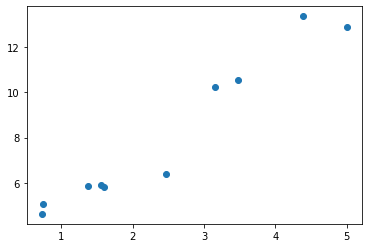

In [ ]:
# Let's see the resulting x-y distribution
x, y = get_fake_data(batch_size=10)
plt.scatter(x.squeeze().cpu().numpy(), y.squeeze().cpu().numpy())

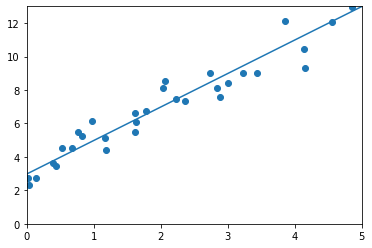

w:  1.906325340270996 b:  2.937190532684326


In [ ]:
# random initialization parameters
w = t.rand(1, 1).to(device)
b = t.zeros(1, 1).to(device)

lr =0.02 # learning rate

for ii in range(1000):
    x, y = get_fake_data(batch_size=4)
    
    # forward：calculate loss
    y_pred = x.mm(w) + b.expand_as(y) # x@W is equivalent to x.mm(w); for python3 only
    loss = 0.5 * (y_pred - y) ** 2 # mean square error
    loss = loss.mean()
    
    # backward：manually calculate the gradient
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    # Update parameters
    w.sub_(lr * dw)
    b.sub_(lr * db)
    
    if ii%50 ==0:
       
        # drawing
        display.clear_output(wait=True)
        x = t.arange(0, 6, device = device).view(-1, 1)
        y = x.float().mm(w) + b.expand_as(x)
        plt.plot(x.cpu().numpy(), y.cpu().numpy()) # predicted
        
        x2, y2 = get_fake_data(batch_size=32) 
        plt.scatter(x2.cpu().numpy(), y2.cpu().numpy()) # true data
        
        plt.xlim(0, 5)
        plt.ylim(0, 13)
        plt.show()
        plt.pause(0.5)
        
print('w: ', w.item(), 'b: ', b.item())

It can be seen that the program has basically learned w=2 and b=3, and the straight line and data in the figure have achieved a good fit.

Although there are many operations mentioned above, as long as you master this example, you can basically do it. For other knowledge, when readers encounter it in the future, they can look at the content of this part or find the corresponding documents.